In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [2]:
# Define the image directory (the folder where your images are stored)
image_directory = '/content/drive/MyDrive/Farm Project/Cattle Management System/Automated Breed  Identification/Cattle Breed Idintification/Cattle Breeds/'
categories = os.listdir(image_directory)

# Create empty lists to store image data and labels
X = []
y = []

# Load and preprocess images from categorized subdirectories
for category in categories:
    category_path = os.path.join(image_directory, category)
    image_files = os.listdir(category_path)
    for img_file in image_files:
        img_path = os.path.join(category_path, img_file)
        img = image.load_img(img_path, target_size=(48, 48))  # Load RGB images
        img = image.img_to_array(img)
        img /= 255.0
        X.append(img)
        y.append(category)

# Convert labels to numerical values
labels = pd.get_dummies(y)

X = np.array(X)
y = labels.values

# Split data into train and validation sets
X, y = shuffle(X, y, random_state=42)  # Shuffle the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
print(categories)

['Ayrshire cattle', 'Sahiwal', 'Jersey cattle', 'Friesian cattle', 'Zebu', 'Local Lankan Cattle (Lanakan White)']


In [4]:
# Define your model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 3)))  # Updated input shape to (48, 48, 3)
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(y.shape[1], activation='softmax'))  # Output layer with the number of categories

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 50

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_val, y_val))

# Save the model
model.save('model_pests_detect.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 29s 606ms/step - accuracy: 0.2309 - loss: 1.7957 - val_accuracy: 0.3125 - val_loss: 1.5792
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 26s 614ms/step - accuracy: 0.3609 - loss: 1.5723 - val_accuracy: 0.5625 - val_loss: 1.1547
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 38s 541ms/step - accuracy: 0.5402 - loss: 1.2321 - val_accuracy: 0.5714 - val_loss: 1.0094
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 549ms/step - accuracy: 0.6027 - loss: 1.0587 - val_accuracy: 0.6161 - val_loss: 0.9422
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 26s 619ms/step - accuracy: 0.6155 - loss: 1.0163 - val_accuracy: 0.6577 - val_loss: 0.8913
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 624ms/step - accuracy: 0.6570 - loss: 0.8803 - val_accuracy: 0.6756 - val_loss: 0.8199
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 38s 548ms/step - accuracy: 0.6991 - loss: 0.7779 - val_accuracy: 0.6518 - val_loss: 0.8326
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 42s 573ms/step - accuracy: 0.7330 - loss: 0.7378 - val_accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


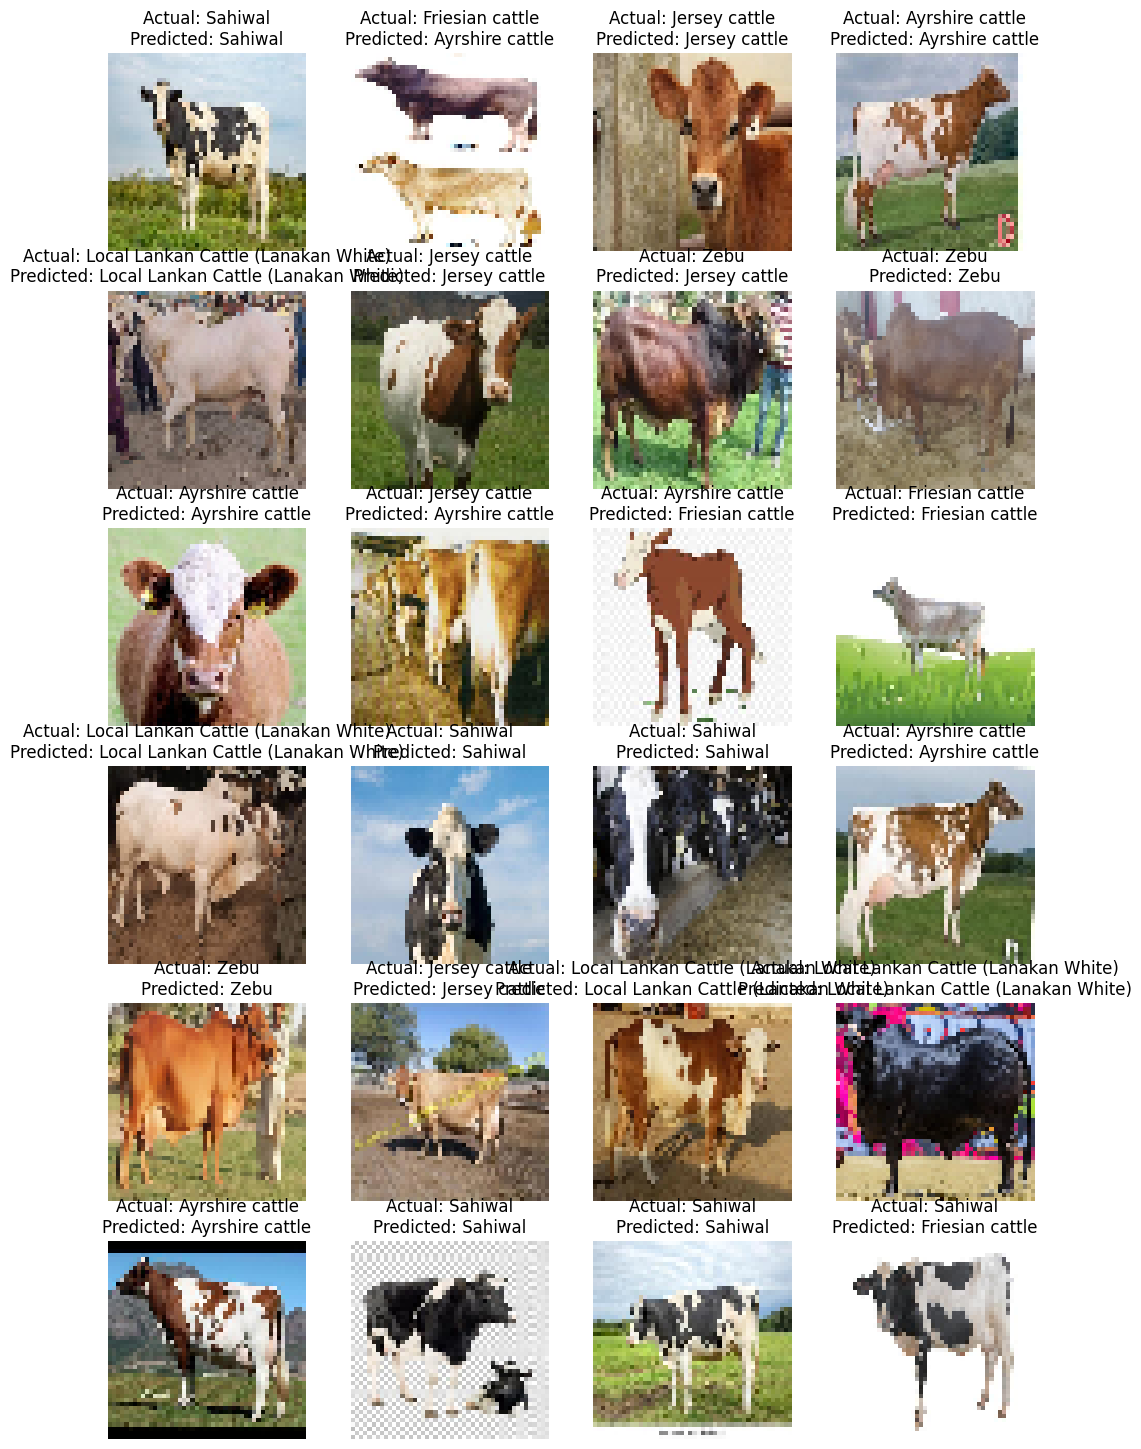

In [5]:


import matplotlib.pyplot as plt
import random
import numpy as np

# Data visualize
sample_size = 24
num_cols = 4
num_rows = sample_size // num_cols


random_indices = random.sample(range(len(X_val)), sample_size)
sample_images = X_val[random_indices]
sample_labels_actual = y_val[random_indices]
sample_labels_predicted = model.predict(sample_images)

# Classes
class_names = ['Ayrshire cattle', 'Sahiwal', 'Jersey cattle', 'Friesian cattle', 'Zebu', 'Local Lankan Cattle (Lanakan White)']

plt.figure(figsize=(12, 18))
for i in range(sample_size):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(sample_images[i].reshape(48, 48, 3), cmap="gray")
    actual_class_index = np.argmax(sample_labels_actual[i])
    predicted_class_index = np.argmax(sample_labels_predicted[i])
    plt.title(f"Actual: {class_names[actual_class_index]}\nPredicted: {class_names[predicted_class_index]}")
    plt.axis('off')

plt.show()
